# Taylor Couette Analysis

## Get image

Align the camera so the Taylor-Couette column is centered between the top and bottom of the image and there is perhaps 5% extra image beyond the end rings at each end.

There might be a delay of many seconds before the image is actually displayed. (Not sure why.)

(480, 640, 3)


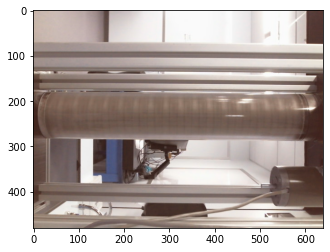

In [2]:
camera_index = 0 # index 0 is default camera, 1 for alternate camera

import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture(camera_index)
ret, img = cap.read()
cv2.imwrite('TaylorVortices.png',img)

#% matplotlib inline
print(img.shape)

plt.imshow(img,cmap = 'gray')
plt.show()

## Get timelapse sequence
Skip this! It may be useful later when looking at time-dependent flow like spiral vortex flow.

In [3]:
import cv2
import numpy as np
import time

nframes = 10
interval = 1 # seconds
camera_index = 0 # index 0 is default camera, 1 for alternate camera
filepath = '/Users/randalltagg/Documents/iPython Notebooks/Taylor Couette analysis/timelapse6/'


# Still trying to figure out how to force the object index to reliably point
# to the USB camera

# create the image capture object
cap = cv2.VideoCapture(camera_index)

for i in range(nframes):
  print('{0:d}'.format(i),end='\r')
  ret, img = cap.read()
  cv2.imwrite(filepath+'img_'+str(i).zfill(4)+'.png',img)
  time.sleep(interval)

print()
cap.release()


9


## Look at actual image from a time-lapse sequence

(480, 640)


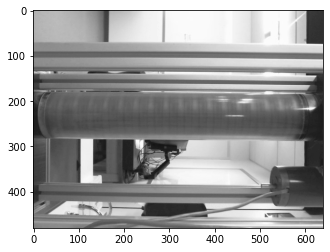

In [2]:
#% matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

#filepath = '/Users/randalltagg/Documents/iPython Notebooks/Taylor Couette analysis/timelapse6/'
#i=1
#imagefile = filepath+'img_'+str(i).zfill(4)+'.png'
imagefile = 'TaylorVortices.png'
img = cv2.imread(imagefile,0)
print(img.shape)

plt.imshow(img,cmap = 'gray')
plt.show()

## Selecting region of interest

Original image sizes (480, 640)
Ragion of interest sizes (100, 610)


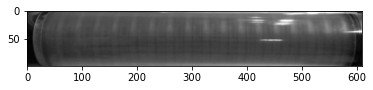

In [4]:
#% matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

ylower = 180
yupper = 280
xlower = 0
xupper = 610

filepath = '/Users/randalltagg/Documents/iPython Notebooks/Taylor Couette analysis/timelapse4/'
i=1
#imagefile = filepath+'img_'+str(i).zfill(4)+'.png'
#img = cv2.imread(imagefile,0)
print('Original image sizes',img.shape)

TC_column = img[ylower:yupper,xlower:xupper]
print('Ragion of interest sizes',TC_column.shape)


plt.imshow(TC_column,cmap = 'gray')
plt.show()

## 2D Fast Fourier transform

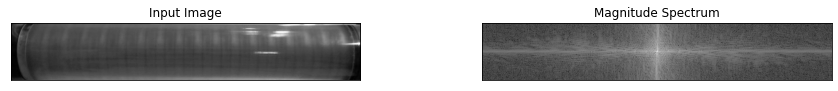

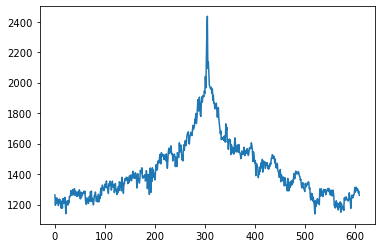

In [5]:
#% matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

'''
filepath = '/Users/randalltagg/Documents/iPython Notebooks/Taylor Couette analysis/timelapse4/'
i=1
imagefile = filepath+'img_'+str(i).zfill(4)+'.png'
img = cv2.imread(imagefile,0)
'''

#f = np.fft.fft2(TC_column[0:250,0:1300,0])
f = np.fft.fft2(TC_column)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
ysize=np.size(magnitude_spectrum,axis=0)
xsize=np.size(magnitude_spectrum,axis=1)

plt.figure(0)
# See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.subplot(121),plt.imshow(TC_column, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'rainbow')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25, wspace=0.35)

yrow = 55
plt.figure(1)
kx = np.arange(xsize)
Skx = np.zeros(xsize)
# Sum several rows of the 2D spectrum
for i in range(yrow-5,yrow+5):    
    Skx = Skx + magnitude_spectrum[i,0:xsize+1]
plt.plot(kx,Skx)
plt.show()


## Multiple 1-D Fourier transforms

Instead of doing a 2D Fourier transform of the whole image, compose a pseudo-image as a gray-scale rendering of 1-D Fourier transforms of each row of the image. Then run the code several times to select a row that gives the clearest identification of peaks in the 1D spectrum. Run a separate short code to output this row to a temporary file 'outfile.csv' to examine to locate the exact peak locations using a spreadsheet viewer. (Remember to subtract 1 from the spreadsheet row number to give the pixel number.)

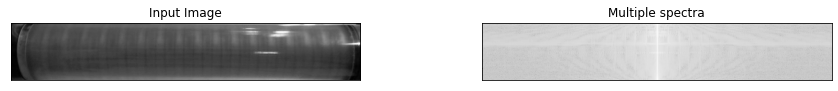

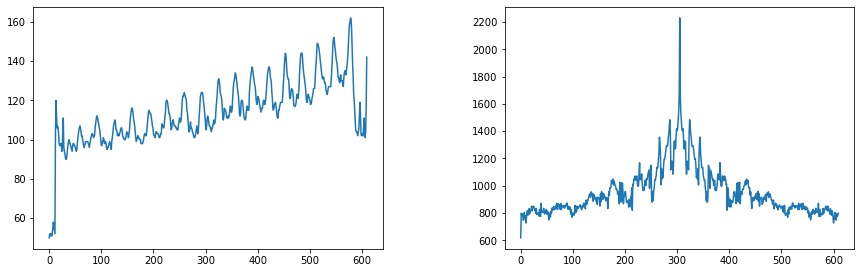

yrow =  30


In [6]:
#% matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

'''
filepath = '/Users/randalltagg/Documents/iPython Notebooks/Taylor Couette analysis/timelapse4/'
i=1
imagefile = filepath+'img_'+str(i).zfill(4)+'.png'
img = cv2.imread(imagefile,0)
'''

f = np.fft.fft2(TC_column)
ff = f # creation of new array with temporary values
(Ny,Nx) = np.shape(ff)
for i in range(0,Ny):
    ff[i,:] = np.fft.fftshift(np.fft.fft(TC_column[i,:]))
magnitude_spectrum = 20*np.log(np.abs(ff))

plt.figure(0)
# See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.subplot(121)
plt.imshow(TC_column, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
#plt.imshow(magnitude_spectrum, cmap = 'rainbow')
plt.title('Multiple spectra'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25, wspace=0.35)

yrow = 30
samplenumbers = np.arange(Nx)
plt.figure(1)
plt.subplot(121)
plt.plot(samplenumbers,TC_column[yrow,:])
#kx = np.arange(xsize)
Skx = np.zeros(Nx)
# Sum several rows of the 2D spectrum
for i in range(yrow-5,yrow+5):    
    Skx = Skx + magnitude_spectrum[i,:]
plt.subplot(122)
plt.plot(kx,Skx)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25, wspace=0.35)

plt.show()

print('yrow = ',yrow)


## Save row data to a file

Run the following short code to output the averaged rows of data saved in the array Skx to a temporary file 'outfile.csv' to examine to locate the exact peak locations using a spreadsheet viewer. (Remember to subtract 1 from the spreadsheet row number to give the pixel number.)

In [7]:
# Output to csv file
np.savetxt('outfile.csv',Skx,fmt='%d',delimiter=',', newline='\n')

## Understanding the Fourier analysis

Suppose the space sample goes from x = 0 to X = L in N pixels. 

From a calibration, you determine that there are $N_{\text{cal}}$ pixels between the end rings that are spaced a distance $h$ appart. Thus the size of each pixel is:

$$ \Delta x = \frac{h}{N_{\text{cal}}}. $$

Then 

$$ L = N \Delta x. $$

When you make a discrete Fourier transform of a row of length L sampled with N spatial samples of spacing $\Delta x$, the resulting range of the Fourier transform is:

$$ -\frac{\pi}{\Delta x} < k < \frac{\pi}{\Delta x}  $$.

The spacing of the N samples in $k$-space is:

$$ \Delta k = \frac{2 \pi}{L}.$$

As a check, we see that

$$ N \Delta k = N \frac{2 \pi}{L} = 2 \pi \frac{N}{L} = 2 \pi \frac{1}{\Delta x} = \frac{\pi}{\Delta x} - (-\frac{\pi}{\Delta x}). $$

For a peak located at value n on the horizontal axis of the uncalibrated Fourier transform, the corresponding wavenumber is

$$ k = (n - \frac{N}{2})*\Delta k = (n - \frac{N}{2})\frac{2 \pi}{L}.$$

This would correspond to a spatial periodicity

$$ \lambda = \frac{2 \pi}{k} = \frac{L}{n - \frac{N}{2}}. $$

## Example

In the example data, N = 610.

From examining the image in a separate  application, the spacing between rings at the row of interest is N_cal = 567.

This corresponds to a height of the fluid column $h = 52$ cm. 

So $\Delta x = \frac{52}{567} = 0.09171 $ cm.

The total length of the image is $L = N \Delta x = 610 * 0.09171 = 55.94 $ cm.

The increment in wavenumber is $\Delta k = \frac{2 \pi}{L} = \frac{2 \pi}{55.94} = 0.1123 \text{ cm}^{-1}. $

Looking at the data file, the center peak is at point 306, not 305.

The first peak beyond the center peak is at pixel 324. (This was found by looking at the output file of the fourier transform.)

This peak then corresponds to a wavenumber:

$$ k = (324 - 305)0.1123 = 2.134 \text{ cm}^{-1}.$$

This corresponds to a spatial period (a vortex pair)

$$ \lambda = \frac{2 \pi}{k} = \frac{2 \pi}{2.134} = 2.95 \text{ cm}. $$

Compare this to twice the gap $2d = 2 \times 1.534 = 3.07$ cm.



